# Part II - (Exploration of Prosper Loans DataSet)
## by (Sarah Mitchell)

## Introduction
#### In this investigation, I wanted to explore Prosper’s Yield. I wanted to see where they profited the most income. This dataset has an abundance of information from rates to occupations to collection fees. I wanted to focus on rates, yields, credit scores and income.  I also wanted to investigate when and who closes more loans.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.core.display import HTML
from nltk.corpus import reuters
import nltk
import PIL.Image as Image



%matplotlib inline

In [3]:
loans = pd.read_csv('prosperLoanData.csv')

In [5]:
# Convert 'ListingCreationDate' type from str to datetime 
loans['LoanOriginationDate']=pd.to_datetime(loans['LoanOriginationDate'])

# Extract date information from ListingCreationDate column
loans['date'] = loans['LoanOriginationDate'].dt.date

# Extract year information from ListingCreationDate column
loans['year']= loans['LoanOriginationDate'].dt.year

# Extract month information from ListingCreationDate column
loans['month']= loans['LoanOriginationDate'].dt.month

# Convert 'date' type from str to datetime 
loans['date']=pd.to_datetime(loans['date'])

In [6]:
# Cleaning income - droping 'not displayed'

loans['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

ordinals = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinals)
loans['IncomeRange'] = loans['IncomeRange'].astype(ordered_var)

In [7]:
# Cleaning the Credit Rates 

rates = ['AA', 'A', 'B', 'C', 'D', 'E']

ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rates)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered_var)

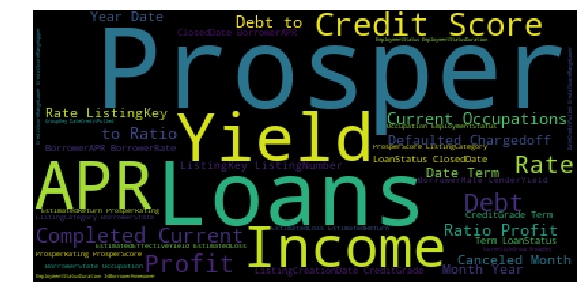

In [4]:
plt.figure(figsize = [10,5])
text = open('prospercloud.txt').read()
wc = WordCloud(stopwords = ['False','True']).generate(text)

plt.imshow(wc)
plt. axis("off")
plt.show()

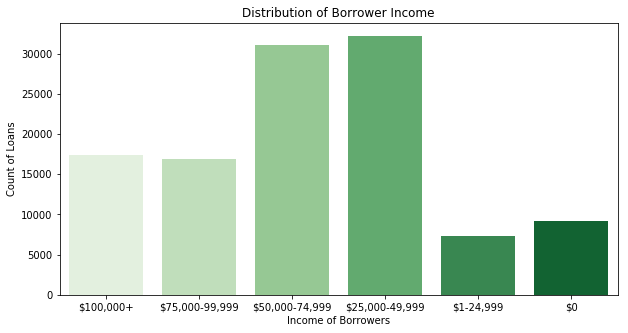

In [8]:
# Looking to see the number of loans compared to the income the borrower has.

plt.figure(figsize = [10, 5])
sns.countplot(data = loans, x = 'IncomeRange', palette = "Greens")
plt.ylabel('Count of Loans')
plt.xlabel('Income of Borrowers')
plt.title('Distribution of Borrower Income');


- The majority of Prosper’s borrowers are the average income bracket with over 30,000 loans.
- Those borrowers gross income is  25,000 to 74,999.
- The lower gross income bracket at 0 to 24,999 has no more than 10,000 loans.
- The higher gross income bracket at 75,00 to 100,000+ has under 20,000 loans.


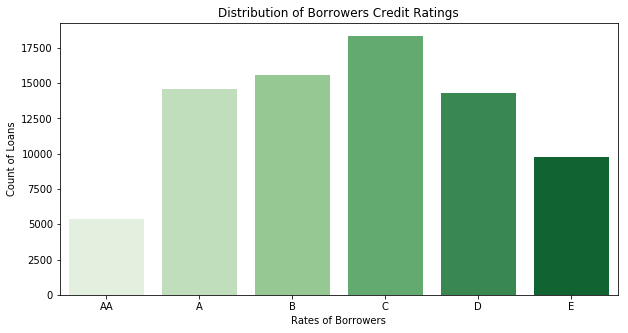

In [9]:
# Looking at see the number of loans each credit score has.

plt.figure(figsize = [10, 5])
sns.countplot(data = loans, x = 'ProsperRating (Alpha)', palette = sns.color_palette(palette='Greens'))

plt.xlabel('Rates of Borrowers')
plt.ylabel('Count of Loans')
plt.title('Distribution of Borrowers Credit Ratings');


- The average credit score borrowers at ‘B’ and ‘C’ tend to acquire more loans.
- The top score with ‘AA’ have received the least amount of loans with around 5000.
- The lowest score at ‘E’ has acquired  around 10,000 loans. Which we will see has a large yield for Prosper.


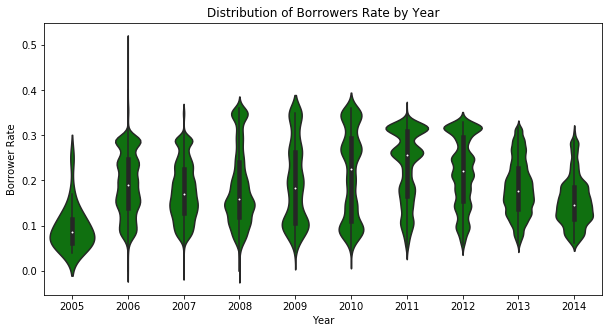

In [10]:
# Looking at the borrowers rate vs the years and lenders yield vs year

plt.figure(figsize = [10, 5])
sns.violinplot(data = loans, x ='year', y ='BorrowerRate', color = 'G')
plt.title('Distribution of Borrowers Rate by Year')
plt.ylabel('Borrower Rate')
plt.xlabel('Year');

- In 2005 Prosper closed more loans than any other year showing.  That year did have to lowest rates to go with it. 
- Between 2008 to 2011 the rates were at their highest, which lead to less loans. 
- The rates started to drop in 2012 which lead a steady increase in loans to 2014.


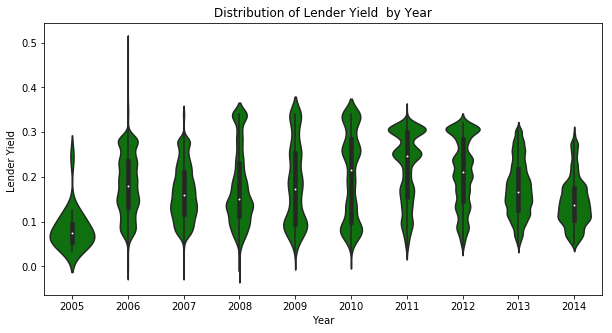

In [11]:
# Looking at the borrowers rate vs the years and lenders yield vs year

plt.figure(figsize = [10, 5])
sns.violinplot(data = loans, x ='year', y ='LenderYield', color = 'G')
plt.title('Distribution of Lender Yield  by Year')
plt.ylabel('Lender Yield ')
plt.xlabel('Year');

- Prospers yield reflect closely with the rates by year. 
- The yield is at its highest in 2005 and 2014, where the rates are lower. 
- In the years 2008 to 2010 the yield was low due to the higher rates. 
- Borrowers will borrow less when the rates are higher, which reflects on Prospers profits.


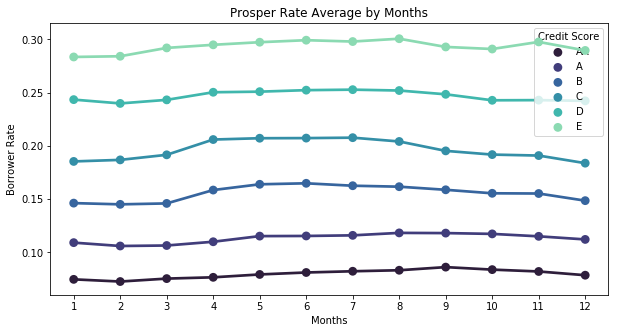

In [12]:
plt.figure(figsize=[10,5])

sns.pointplot(data=loans, x='month', y='BorrowerRate', hue='ProsperRating (Alpha)',
                   palette='mako');
plt.legend(loc=1, title='Credit Score');
plt.title('Prosper Rate Average by Months');
plt.ylabel('Borrower Rate')
plt.xlabel('Months');

- This chart proves that the higher the credit score the lower the borrowers rate will be. 
- Over the months you can see Prosper will slowly change rates.
- Slowly changing the rates keeps the yield from having a dramatic change. 


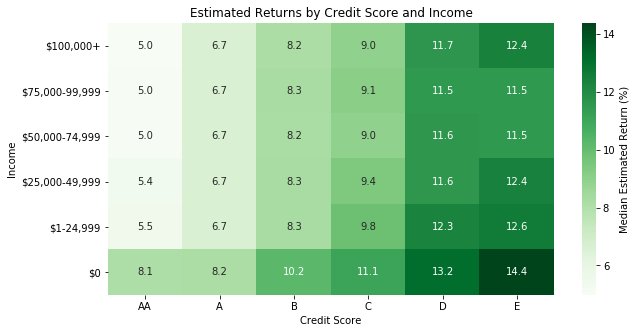

In [13]:
# Looking at average estimated returns

plt.figure(figsize = [10,5])

cat_med = loans.groupby(['ProsperRating (Alpha)', 'IncomeRange']).median()['EstimatedReturn']*100
cat_med = cat_med.reset_index(name = 'EstimatedReturnMedian')
cat_med = cat_med.pivot(index = 'IncomeRange', columns = 'ProsperRating (Alpha)', values = 'EstimatedReturnMedian')

sns.heatmap(cat_med, annot = True, fmt = '.1f', cmap = "Greens", cbar_kws = {'label' : 'Median Estimated Return (%)'})
plt.xlabel('Credit Score')
plt.ylabel('Income')
plt.title('Estimated Returns by Credit Score and Income');

- This chart displays the income range, credit scores, and Prospers estimated return from each. 
- Prosper gains more profit from ‘E’ credit score with lower income than any other type of borrower. The ‘D’ and ‘E’ borrowers on average are more profitable for Prosper. 
- The ‘AA’ and ‘A’ borrowers have the best credit scores, which means has the lowest yielding borrowers.


## Conclusion
- Prosper has all different types of borrowers they lend to. It does not matter who the borrower is or what profession they have. They make the majority on their profits off of rates and fees. Which goes off of credit score and how well the borrower make their monthly payments. 
